In [1]:
import os 
import json
import pandas as pd
import seaborn as sns
import numpy as np
import math

from utils.analysys_utils import list_experiments_in_dir

In [2]:
experiments_path = os.path.join(os.getcwd(), "runs", "derivative_reg", "sidarthe_extended", "Italy")
experiments = list_experiments_in_dir(experiments_path)

# sort experiments by derivative regularization term
experiments.sort(key=lambda exp: exp['settings']['der_1st_reg'])

In [16]:
# generate data for graphs

# take as baseline the exp with 0. regularization
base_val_loss = experiments[0]['final']['best_epoch']['val_loss']
base_der_loss = 0.

# use value of derivative regularization as x axis

data = {
    "der_1st_reg": [],
    "val_loss": [],
    "der_1st": []
}
for exp in experiments:
    der_1st_reg = exp['settings']['der_1st_reg']
    if der_1st_reg == 0.:
        continue

    data['der_1st_reg'].append(der_1st_reg)

    val_loss = exp['final']['best_epoch']['val_loss']
    data['val_loss'].append(val_loss)

    # normalize w.r.t. regularization weight
    der_1st_loss = exp['final']['best_epoch']['losses']['der_1st'] / der_1st_reg
    data['der_1st'].append(der_1st_loss)

    #val_gain = base_val_loss - val_loss
    #indices.append(val_gain / -math.log10(der_1st_loss))

df = pd.DataFrame(data)
df

,der_1st_reg,val_loss,der_1st
0,1.000000e+00,12451.946435,0.000277
1,1.000000e+00,12451.946435,0.000277
2,1.000000e+00,12451.946435,0.000277
3,1.000000e+00,12451.946435,0.000277
4,1.000000e+00,12451.946435,0.000277
...,...,...,...
255,1.000000e+13,96745.169747,0.000045
256,1.000000e+13,96745.169747,0.000045
257,1.000000e+13,96745.169747,0.000045
258,1.000000e+13,96745.169747,0.000045


In [ ]:
def group_by_and_compute_ci(df, group_by):
    grouped_df = df.groupby(group_by).agg(['mean', 'std', 'count'])['val_loss']
    grouped_df['ci95'] = 1.96 * grouped_df['std'] / grouped_df['count'].pow(0.5)
    return grouped_df



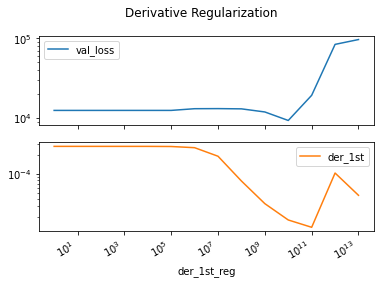

In [43]:
# plot regularization weight vs validation loss
pl_title = "Derivative Regularization"
plot = df.plot(x='der_1st_reg', subplots=True, title=pl_title, logx=True, logy=True)
#plot.set(xscale="log")
#plot.set_title("Regularization Weight vs Validation Loss")

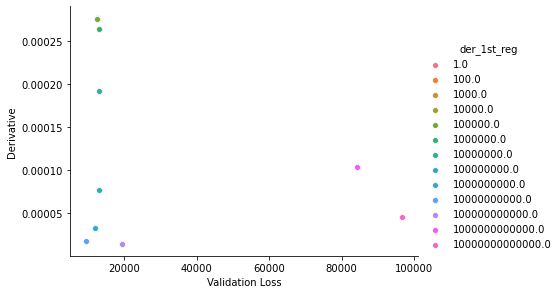

In [64]:
# draw scatter plot to see pareto front
fg = sns.FacetGrid(df, hue='der_1st_reg', height=4, aspect=1.5)
fg.map_dataframe(sns.scatterplot, x="val_loss", y="der_1st")
fg.set_axis_labels("Validation Loss", "Derivative")
fg.add_legend()